# Introduction to graphical models

Mehdi Garrousian - mgarrous@alumni.uwo.ca - Dec 1, 2017 - Ryerson U. 

Goal: Given some observed data $\{(x_1^1,\dots, x_n^1),\dots, (x_1^m,\dots, x_n^m)\}$ in the joint probability space of $n$ random variables $X_1,\dots, X_n$, make predictions about new events by estimating the pertinent joint and conditional probabilites. 

#### Monty Hall problem (Wiki)

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? 

<img src="montyhall.png">

### Some Statistics

Conditional probability: $$p(\alpha | \beta) = \frac{p(\alpha \cap \beta)}{p(\beta)}$$

Chain rule:
    $$p(\alpha_1\cap \dots \cap\alpha_k) = p(\alpha_1) p(\alpha_2|\alpha_1) \dots p(\alpha_k|\alpha_1\cap\dots\cap \alpha_{k-1})$$

Bayes' rule allows you to switch around the event and the condition. 

A random variable $X$ is a map that labels the elements of a sample space $\Omega$. 

\begin{align}
X: \Omega & \to \mathbb{R} \\
p(X=x) & := p(\{\alpha \in \Omega: X(\alpha)=x\})
\end{align}

We say two events $\alpha$ and $\beta$ are independent if $p(\alpha| \beta)=p(\alpha)$ or if $p(\beta)=0$, and denote this by $\alpha \_\|\_  \beta$, which is equivalent to $p(\alpha \cap \beta) = p(\alpha) p(\beta)$. 

Example. Let's toss a coin and a die and let:

$\alpha$ = (die = 6),  $\beta$ = (die = odd number),  and $\gamma$ = (coin = H). 

Then:
$$ \alpha \_\|\_ \gamma, \quad \alpha \_\not\|\_ \beta$$

#### Conditional version

Say $\alpha \_\|\_ \beta\, \big| \, \gamma$ if $p(\alpha | \beta \cap \gamma) = p(\alpha | \gamma)$ or $p(\beta\cap \gamma) = 0$. 

This is equivalent to $p(\alpha \cap \beta | \gamma)= p(\alpha|\gamma)p(\beta|\gamma)$.

<font color='blue'>In a nutshell: indepdence allows you to multiply instead of taking joint probability.</font>

### Bayesian Networks

A Bayesian Network is a directed acyclic graph $G=(V,E)$ together with a random variable $X_i$ and a conditional probability distribution (CPD) $p(X_i|Pa(X_i))$ for each vertex $i$ where $Pa(X_i)$ represents the parents of vertex $i$. 

<img src="V.png">

#### Example. 

V-structure with X = (die 1 = 1), Y = (die 2 = 4) and Z = (sum = 4). 

$$p(x,y,z) = p(Z=z|X=x)p(Y=y|Z=z)p(X=x)p(Y=y)$$

Note that $X \_\|\_ Y$ but $X  \_\not\|\_ Y \big| Z$. 

#### Factorization of Probability Distributions
Let $G$ be a BN graph over the variables $X_1,\dots, X_n$. We say that a distribution $p$ over the same space factorizes over $G$ if
$$p(X_1,\dots, X_n) = \Pi_{i=1}^n p(X_i|Pa(X_i^G))$$
This is the chain rule for Bayesian Networks. 

#### Local independencies:

For each $X_i$, we have $$X_i \_\|\_ {\textrm{NonDescendants}}(X_i)\, \big|\, Pa(X_i)$$

#### Active trails

A trail $X_1 \leftrightarrow X_2 \cdots \leftrightarrow X_n$ is active given $C$ if we have a V-structure $X_{i-1}\rightarrow X_i \leftarrow X_{i+1}$, $X_i$ or one of its descendants belong to $C$. Otherwise, no node of $C$ is allowed to be on the trail.

#### $d$-separation and Global Independencies

Let $A, B$ and $C$ be subsets of vertices of $G$. We say $A$ and $B$ are $d$-separated given $C$ if there are **no active trails** from any node in $A$ to any node in $B$ when $C$ is observed.

In other words, whenever there's a path, some observed variables blocks it unless the observed variable is the base of a $V$-structure or one of its descendants. 

##### Example 

<img src="student_graph.png">

Theorem: If a distribution $P$ factorizes over $G$, then $I(G)\subseteq I(P)$. 

Moreover, for all distributions except a set of measure zero, equality holds.

#### Local Indep = Global Indep

### Queries

-- <font color='green'>Probability query:</font>
- Evidence: a subset of the random variables $E$ and an instantiation $e\in E$. 
- Query variables: a subset $Y$ of the random variables in the network. 

$$p(Y|e)?$$

Example: pr(have flu | runny nose)?

-- <font color='green'>Most probable explanation (MAP query):</font> let W = V - E.
$$MAP(W|e) = {\textrm{argmax}}_{w}p(w|e)$$

Example: what's the correction in a word that has a spelling error?

In principle, both of types of queries require variable elimination. 

$$p(a,b) = \sum_{c,d} p(a,b,c,d)$$

<font color='blue'>The factorization of a Bayesian network facilitates the process by breaking the sum over fewer variables.</font>

### Back to the Monty Hall question. 

In [1]:
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# credit: pgmpy documentation

# Defining the network (V-)structure, C = Contestant, H = Host and P = Prize
model = BayesianModel([('C', 'H'), ('P', 'H')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 3, [[0.33, 0.33, 0.33]])
cpd_p = TabularCPD('P', 3, [[0.33, 0.33, 0.33]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'P'], evidence_card=[3, 3])

In [2]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

In [3]:
print(cpd_c)

╒═════╤══════╕
│ C_0 │ 0.33 │
├─────┼──────┤
│ C_1 │ 0.33 │
├─────┼──────┤
│ C_2 │ 0.33 │
╘═════╧══════╛


In [4]:
# The host won't open the door that has the prize. That's it!
# P(H=h|C,P)
print(cpd_h)

╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│ C   │ C_0 │ C_0 │ C_0 │ C_1 │ C_1 │ C_1 │ C_2 │ C_2 │ C_2 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ P   │ P_0 │ P_1 │ P_2 │ P_0 │ P_1 │ P_2 │ P_0 │ P_1 │ P_2 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.5 │ 1.0 │ 0.0 │ 1.0 │ 0.5 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_1 │ 0.5 │ 0.0 │ 1.0 │ 0.0 │ 0.0 │ 0.0 │ 1.0 │ 0.0 │ 0.5 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_2 │ 0.5 │ 1.0 │ 0.0 │ 1.0 │ 0.5 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │
╘═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╛


In [5]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

In [6]:
infer = VariableElimination(model)
posterior_p = infer.query(['P'], evidence={'C': 0, 'H': 2})
print(posterior_p['P'])

╒═════╤══════════╕
│ P   │   phi(P) │
╞═════╪══════════╡
│ P_0 │   0.3333 │
├─────┼──────────┤
│ P_1 │   0.6667 │
├─────┼──────────┤
│ P_2 │   0.0000 │
╘═════╧══════════╛


P_1 > P_0

### Markov Random Fields or Markov Networks (undirected graphical models)

A Markov Network is a symmetric version of a Bayesian network where one tries to create dependencies among the random variables that are connected in the graph. 

MNs are generally more costly to use than BNs. It's possible to pass from one to the other while controlling the CI formulas. 

#### The Misconception Example

Alice, Bob, Charles and Debbie attend a lecture where the prof makes a mistake. They are associated as the follwoing graph shows and tend to agree or disagree with each other according to the following values ...

In [7]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor
MSC = MarkovModel()
MSC.add_nodes_from(['Alice', 'Bob', 'Charles','Debbie'])
MSC.add_edges_from([('Alice', 'Bob'), ('Bob', 'Charles'),('Charles', 'Debbie'), ('Debbie', 'Alice')])

In [8]:
factor_ab = DiscreteFactor(['Alice', 'Bob'], cardinality=[2, 2],values=[30, 5, 1, 10])
factor_bc = DiscreteFactor(['Bob', 'Charles'], cardinality=[2, 2],values=[100, 1, 1, 10])
factor_cd = DiscreteFactor(['Charles', 'Debbie'], cardinality=[2, 2],values=[1, 100, 100, 1])
factor_da = DiscreteFactor(['Debbie', 'Alice'], cardinality=[2, 2],values=[100, 1, 1, 100])

In [9]:
MSC.add_factors(factor_ab,factor_bc,factor_cd,factor_da)

In [10]:
from pgmpy.inference import VariableElimination 
MSC_elim = VariableElimination(MSC)

In [11]:
A = MSC_elim.query(['Alice'], evidence={'Debbie': 1,'Bob': 0})
print(A['Alice'])

╒═════════╤══════════════╕
│ Alice   │   phi(Alice) │
╞═════════╪══════════════╡
│ Alice_0 │       0.2308 │
├─────────┼──────────────┤
│ Alice_1 │       0.7692 │
╘═════════╧══════════════╛


In [12]:
A = MSC_elim.query(['Debbie'], evidence={'Charles': 0, 'Alice': 1})
print(A['Debbie'])

╒══════════╤═══════════════╕
│ Debbie   │   phi(Debbie) │
╞══════════╪═══════════════╡
│ Debbie_0 │        0.0099 │
├──────────┼───────────────┤
│ Debbie_1 │        0.9901 │
╘══════════╧═══════════════╛


In [13]:
A = MSC_elim.query(['Bob'], evidence={'Debbie': 1})
print(A['Bob'])

╒═══════╤════════════╕
│ Bob   │   phi(Bob) │
╞═══════╪════════════╡
│ Bob_0 │     0.9216 │
├───────┼────────────┤
│ Bob_1 │     0.0784 │
╘═══════╧════════════╛


In [14]:
# independeces of the original model
MSC.get_local_independencies()

(Alice _|_ Charles | Debbie, Bob)
(Bob _|_ Debbie | Alice, Charles)
(Charles _|_ Alice | Debbie, Bob)
(Debbie _|_ Bob | Alice, Charles)

In [15]:
MSC.to_bayesian_model().edges()

[('Debbie', 'Bob'),
 ('Debbie', 'Alice'),
 ('Debbie', 'Charles'),
 ('Bob', 'Alice'),
 ('Bob', 'Charles')]

In [16]:
MSC.to_bayesian_model().edges()

[('Debbie', 'Bob'),
 ('Debbie', 'Alice'),
 ('Debbie', 'Charles'),
 ('Bob', 'Alice'),
 ('Bob', 'Charles')]

In [17]:
# independeces of the BN analogue
MSC.to_bayesian_model().get_independencies()

(Alice _|_ Charles | Debbie, Bob)
(Charles _|_ Alice | Debbie, Bob)

### The joint probability

Let $\cal{C}$ be the collection of cliques (complete subgraphs) of $G$. 

Given positive $\mathbb{R}$ functions $\varphi_C:{\mathcal{V}}_C\to {\mathbb{R}}$, one per clique, a MN (or MRF) defines a joint probability distribution as follows. 

#### Factors

Let $C$ be a set of random variables on an MN. A factor is a function $\phi: Val(C)\to \mathbb{R}$. A higher value between two values indicates an affinity or compatibility between them. 

\begin{align}
p(V=v) = \frac{1}{Z} \Pi_{C\in \mathcal{C}}\phi_C(X_C)
\end{align}
$Z$ is the normalization factor. 

#### Pairwise Independence

Given a nonadjacent pair $(X,Y)$, we have $X \_\|\_ Y \, \big| \,V\setminus\{ X,Y\}$.


#### Makov Blanket Independecies

Given a vertex $X$, we have $X \_\|\_  (V-{\textrm{MB}}(X)-\{X\}) | {\textrm{MB}}(X)$.

#### Active Paths

Let $G$ be a MN structure and $X_1-\cdots-X_n$ a path. Let $Z\subset V$ be a set of observed variables. The path $X_1-\cdots-X_n$ is active given $Z$ if none of $X_i$'s is in $Z$. 

#### Separation 

We say $Z$ separates $X$ and $Y$ if there's no active path from any node in $X$ to any node in $Y$. The collection of all such triples defines the **global dependcies**. In other words, variables $X,Y$ are dependent if they are connected by a path of unobserved variables.

**Theorem.** If $X$ and $Y$ are not separated given $Z$ in a MN strcutre $G$. Then, $X$ and $Y$ are dependent in a distribution that factorizes over $G$. 

# Learning

#### Maximum Likelihood Estimation

In estimating a statistical model, MLE attempts to choose the parameters that make the given observed data most likely. 

Example. Assume we have a skewed coin and a RV $X$ with $X=1$ for heads and $X=0$ for tails. We flip the coin $n$ times and observe that we have $\{h\cdot 1, t\cdot 0\}$. 

Let's estimate $p(X=1)=\theta$ (and $p(X=0)=1-\theta$). 
For a single flip:
$$p_{\theta}(x)= x\theta +(1-x)(1-\theta)$$
And, the joint distribution:
$$p_{\theta}(h\cdot 1, t\cdot 0) = \theta^h (1-\theta)^{n-h}$$
As an example, let's say $n=5$ and $t=3$, then $p_{\theta}=\theta^3(1-\theta)^2$ which is our likelihood function to be maximized. 

Use highschool calc: $\quad p_{\theta}'=3\theta^2 (1-\theta)^2 - 2 \theta^3 (1-\theta)=\theta^2\theta(3(1-\theta)-2\theta)=0 \quad \rightarrow \quad 3-5\theta=0 \quad \rightarrow \quad \theta=\frac{3}{5}=\frac{t}{t+h}$

This works analogously for serveral variables.

## A Bayesian Network for Medical Diagnosis 

In [18]:
# credit: Andrew McCallum, UMASS, 
# https://people.cs.umass.edu/~mccallum/courses/gm2011/hw1.html

# A GM for the binary values of the following parameters
# (0) IsSummer true if it is the summer season, false otherwise.
# (1) HasFlu true if the patient has the flu.
# (2) HasFoodPoisoning true if the patient has food poisoning.
# (3) HasHayFever true if patient has hay fever.
# (4) HasPneumonia true if the patient has pneumonia.
# (5) HasRespiratoryProblems true if the patient has problems in the respiratory system.
# (6) HasGastricProblems true if the patient has problems in the gastro-intestinal system.
# (7) HasRash true if the patient has a skin rash.
# (8) Coughs true if the patient has a cough.
# (9) IsFatigued true if the patient is tired and fatigued.
# (10) Vomits true if the patient has vomited.
# (11) HasFever true if the patient has a high fever.

import pandas as pd
from six.moves import urllib
import os
import tarfile 
from os import listdir

download_path = 'https://people.cs.umass.edu/~mccallum/courses/gm2011/hw1.tar.gz'
data_path = './data/'

In [19]:
if not os.path.isdir(data_path):
    os.makedirs(data_path)
    
    gz_path = os.path.join(data_path, 'hw1.tar.gz')
    urllib.request.urlretrieve(download_path, gz_path)
    gz = tarfile.open(gz_path)
    gz.extractall(path=data_path)
    gz.close() 
    
    os.listdir(data_path)
    path = os.path.join(data_path, os.listdir(data_path)[0])

DataIn = np.loadtxt(path)
print('# data points:',len(DataIn))
# decimal representation of the 12 bit binary representation of the above random variables
DataIn[0:10]
D = [int(x) for x in DataIn]

trueJointDistro = np.loadtxt(data_path+'joint.dat') # The true joint probability distribution
trueJointDistro = list(trueJointDistro[:,1])

('./data/hw1.tar.gz', <http.client.HTTPMessage at 0x7f0f8c1bf748>)

['dataset.dat', 'joint.dat', 'hw1.tar.gz']

# data points: 4000000


array([   1.,  136.,    8.,    0.,  129.,    0.,  512.,  128.,    0.,    1.])

In [20]:
def binToVec(x):
    V = []
    x = x[2:]
    l = len(x)
    for i in range(l):
        V.append(x[l-i-1])
    for i in range(l,12):
        V.append(0)
    return V

In [21]:
summer = []
flu = []
foodPois = []
hayFev = []
pneum = []
resp = []
gastric = []
rash = []
cough = []
fatigued = []
vomit = []
fever = []

v = []

for i in range(len(D)):
    x = D[i]
    x = bin(x)
    v = binToVec(x)
    
    summer.append(int(v[0]))
    flu.append(int(v[1]))
    foodPois.append(int(v[2]))
    hayFev.append(int(v[3]))
    pneum.append(int(v[4]))
    resp.append(int(v[5]))
    gastric.append(int(v[6]))
    rash.append(int(v[7]))
    cough.append(int(v[8]))
    fatigued.append(int(v[9]))
    vomit.append(int(v[10]))
    fever.append(int(v[11]))

In [22]:
from pgmpy.models import BayesianModel
G = BayesianModel()
G.add_nodes_from(['summer', 'flu', 'foodPois', 'hayFev', 'pneum', 'resp', 'gastric', 'rash', 
                  'cough', 'fatigued', 'vomit', 'fever']) 
G.add_edges_from([('flu','cough'),('flu','fever'),('flu','fatigued'),('foodPois','vomit'),('foodPois','gastric'),
                  ('foodPois','fever'),('hayFev','rash'),('hayFev','resp'),('hayFev','summer'),
                  ('pneum','cough'),('pneum','fever'),('pneum','resp')])
from pgmpy.estimators import MaximumLikelihoodEstimator

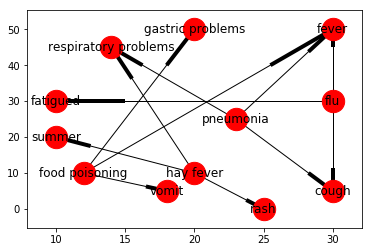

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
Graph = nx.DiGraph()

Graph.add_nodes_from(['summer', 'flu', 'food poisoning', 'hay fever', 'pneumonia', 'respiratory problems', 
                      'gastric problems', 'rash', 'cough', 'fatigued', 'vomit', 'fever']) 
Graph.add_edges_from([('flu','cough'),('flu','fever'),('flu','fatigued'),('food poisoning','vomit'),
                      ('food poisoning','gastric problems'), ('food poisoning','fever'),('hay fever','rash'),
                      ('hay fever','respiratory problems'),('hay fever','summer'),('pneumonia','cough'),
                      ('pneumonia','fever'),('pneumonia','respiratory problems')])

pos = {'summer': (10, 20), 'flu': (30, 30), 'food poisoning': ( 12, 10), 'hay fever': ( 20, 10), 
       'pneumonia': (23, 25), 'respiratory problems': (14, 45), 'gastric problems': (20, 50), 'rash': (25, 0),
       'cough':(30, 5), 'fatigued': (10, 30), 'vomit': (18, 5), 'fever': (30, 50)}

for n, p in pos.items():
    Graph.node[n]['pos'] = p

nx.draw_networkx(Graph, pos = pos, node_size = 500, with_labels = True)

plt.show()
# beautiful vertex locations, right?

In [24]:
RVdata = pd.DataFrame({'summer': summer, 'flu': flu,'foodPois': foodPois, 'hayFev': hayFev, 'pneum': pneum,
                       'resp': resp, 'gastric': gastric, 'rash': rash, 'cough':  cough, 'fatigued': fatigued,
                       'vomit':  vomit, 'fever': fever})
# the column names must match the vertex names
#RVdata

In [25]:
G.fit(RVdata)

In [26]:
RVdata.head()

,cough,fatigued,fever,flu,foodPois,gastric,hayFev,pneum,rash,resp,summer,vomit
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0


In [27]:
cpds = G.get_cpds()
cpds

[<TabularCPD representing P(cough:2 | flu:2, pneum:2) at 0x7f0f88f54e10>,
 <TabularCPD representing P(fatigued:2 | flu:2) at 0x7f0f88f54a58>,
 <TabularCPD representing P(fever:2 | flu:2, foodPois:2, pneum:2) at 0x7f0f871091d0>,
 <TabularCPD representing P(flu:2) at 0x7f0f87109e10>,
 <TabularCPD representing P(foodPois:2) at 0x7f0f87109128>,
 <TabularCPD representing P(gastric:2 | foodPois:2) at 0x7f0f88f54dd8>,
 <TabularCPD representing P(hayFev:2) at 0x7f0f871095f8>,
 <TabularCPD representing P(pneum:2) at 0x7f0f87109a90>,
 <TabularCPD representing P(rash:2 | hayFev:2) at 0x7f0f871094e0>,
 <TabularCPD representing P(resp:2 | hayFev:2, pneum:2) at 0x7f0f87109ef0>,
 <TabularCPD representing P(summer:2 | hayFev:2) at 0x7f0f871096a0>,
 <TabularCPD representing P(vomit:2 | foodPois:2) at 0x7f0f871097b8>]

In [28]:
print(G.get_cpds('resp'))

╒═════════╤═════════════════════╤═════════════════════╤════════════════════╤═════════════════════╕
│ hayFev  │ hayFev(0)           │ hayFev(0)           │ hayFev(1)          │ hayFev(1)           │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ pneum   │ pneum(0)            │ pneum(1)            │ pneum(0)           │ pneum(1)            │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ resp(0) │ 0.9742998112972271  │ 0.24712957900492072 │ 0.4964473281664287 │ 0.14119350371396197 │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ resp(1) │ 0.02570018870277288 │ 0.7528704209950793  │ 0.5035526718335713 │ 0.858806496286038   │
╘═════════╧═════════════════════╧═════════════════════╧════════════════════╧═════════════════════╛


In [29]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(G)

In [30]:
posterior_p = infer.query(['flu'], evidence={'cough': 1, 'fever': 1})
print(posterior_p['flu'])

╒═══════╤════════════╕
│ flu   │   phi(flu) │
╞═══════╪════════════╡
│ flu_0 │     0.4840 │
├───────┼────────────┤
│ flu_1 │     0.5160 │
╘═══════╧════════════╛


In [31]:
posterior_p = infer.query(['flu'], evidence={'cough': 1, 'fever': 0})
print(posterior_p['flu'])

╒═══════╤════════════╕
│ flu   │   phi(flu) │
╞═══════╪════════════╡
│ flu_0 │     0.9641 │
├───────┼────────────┤
│ flu_1 │     0.0359 │
╘═══════╧════════════╛


In [32]:
# G.get_independencies()

In [33]:
print(cpds[9])

╒═════════╤═════════════════════╤═════════════════════╤════════════════════╤═════════════════════╕
│ hayFev  │ hayFev(0)           │ hayFev(0)           │ hayFev(1)          │ hayFev(1)           │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ pneum   │ pneum(0)            │ pneum(1)            │ pneum(0)           │ pneum(1)            │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ resp(0) │ 0.9742998112972271  │ 0.24712957900492072 │ 0.4964473281664287 │ 0.14119350371396197 │
├─────────┼─────────────────────┼─────────────────────┼────────────────────┼─────────────────────┤
│ resp(1) │ 0.02570018870277288 │ 0.7528704209950793  │ 0.5035526718335713 │ 0.858806496286038   │
╘═════════╧═════════════════════╧═════════════════════╧════════════════════╧═════════════════════╛


#### How to extract these conditional probability values from a given CPD?

In [34]:
cpds[9].variables

['resp', 'hayFev', 'pneum']

In [35]:
cpds[9].values

array([[[ 0.97429981,  0.24712958],
        [ 0.49644733,  0.1411935 ]],

       [[ 0.02570019,  0.75287042],
        [ 0.50355267,  0.8588065 ]]])

In [36]:
cpd = cpds[9].values
cpd.shape
cpd

(2, 2, 2)

array([[[ 0.97429981,  0.24712958],
        [ 0.49644733,  0.1411935 ]],

       [[ 0.02570019,  0.75287042],
        [ 0.50355267,  0.8588065 ]]])

In [37]:
# pr(res=1|hayFev=1, pneum=0)
cpd[0][1][0]

0.49644732816642873

## Model Evaluation

Let $p^*$ is the true distribution (if it's available) and $p$ is the estimated one. There are several measures of accuracy:

- The simplest might be based on the $\ell_1$-norm:
$$
\sum_{x_1,\dots, x_n} |p(x_i)-p^*(x_i)|
$$

- A more sophisticated one is based on the concept of entropy:

$$
D(P||P^*)  = E_{\xi \approx p^*}\left[ \log(\frac{p^*(\xi)}{p(\xi)})\right] = \cdots = - H_p(X) - E_{\xi \approx p^*}[log(p)]$$

Here, $H_p(X)$ is the entropy of $X$ and the last term is called the **expected log-likelihood** and our goal is to maximize that across all possible models. 

- The **Kullback-Leibler **(KL) divergence is as follows where our goal is to choose a graph structure that produces a small enough KL value. 

$$KL(p||p^*)=\Sigma_xq(x)\log\frac{p(x)}{p^*(x)}$$

An implementation of the KL divergence follows:

In [38]:
cols = list(RVdata.columns)

dict = {}
for i in range(12):
    dict[cols[i]] = cols.index(cols[i])

print('dict[i] = label of column i in RVdata:')
print('dict=', dict)

def vars_vals_trans(variables, B): # variables is a subset of the column labels (corresponding to the 12 RVs)
    V = []                         # B is a binary vector of length 12
    # R = list(RVdata.loc[i].values)
    l = len(variables)
    for j in range(l):
        V.append(int(B[dict[variables[j]]]))
    return V

def cond_prob(cpd, b): # pr(B_0=b_0|B_1=b_1,...)
    # b is a 12-bit binary vector
    cpd_vars = cpd.variables
    vals = vars_vals_trans(cpd_vars, b)
    p = cpd.values[vals[0]]
    for i in range(1,len(vals)):
        p = p[vals[i]]
    return p

def joint_prob(b, CPDS = cpds): # b is a binary vector of length 12
    c = len(CPDS)
    p = 1
    for i in range(c):
        p *= cond_prob(CPDS[i], b)
    return p

def KL(): # Kullback–Leibler divergence
    D = 0
    for x in range(2**12):
        b = bin(x)
        b = binToVec(b)
        p = joint_prob(b)
        true_p = trueJointDistro[x]
        D += p*np.log(p/true_p)
    return D

dict[i] = label of column i in RVdata:
dict= {'cough': 0, 'fatigued': 1, 'fever': 2, 'flu': 3, 'foodPois': 4, 'gastric': 5, 'hayFev': 6, 'pneum': 7, 'rash': 8, 'resp': 9, 'summer': 10, 'vomit': 11}


In [39]:
# The Kullback-Leibler (KL) divergence:
KL()

1.8593414519066438

#### How can this be improved by changing the graph structure?

### References:
- Probabilistic Graphical Models, Koller and Friedman
- Pgmpy by Ankur Ankan and Abinash Panda
- Online course notes by Andrew McCallum
- Online course notes by Stefano Ermon